In [49]:
import pickle
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from fastparquet import write
import pyarrow as pa
import pyarrow.parquet as pq

In [50]:
df = pd.read_csv('troop_movements.csv')

In [51]:
df.head()

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:54:41,1,x-wing,resistance,1,9,3,5,Dagobah
1,2024-02-06 16:54:40,2,stormtrooper,resistance,7,6,4,7,Haruun Kal
2,2024-02-06 16:54:39,3,tie_fighter,resistance,7,8,8,7,Mon Cala
3,2024-02-06 16:54:38,4,tie_silencer,resistance,7,8,10,9,Cerea
4,2024-02-06 16:54:37,5,at-st,resistance,1,3,2,7,Bestine IV


In [52]:
count1 = df.groupby(['empire_or_resistance'])['empire_or_resistance'].count()
count1_df = pd.DataFrame({'count':count1.values})
count1_df.insert(0, 'empire_or_resistance', ['empire', 'resistance'])
print(count_df)

  empire_or_resistance  count
0               empire    476
1           resistance    524


In [53]:
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-02-06 16:54:41,1,x-wing,resistance,1,9,3,5,Dagobah
1,2024-02-06 16:54:40,2,stormtrooper,resistance,7,6,4,7,Haruun Kal
2,2024-02-06 16:54:39,3,tie_fighter,resistance,7,8,8,7,Mon Cala
3,2024-02-06 16:54:38,4,tie_silencer,resistance,7,8,10,9,Cerea
4,2024-02-06 16:54:37,5,at-st,resistance,1,3,2,7,Bestine IV
...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:38:07,996,unknown,empire,5,2,10,8,Dagobah
996,2024-02-06 16:38:06,997,tie_fighter,empire,4,8,9,6,Dagobah
997,2024-02-06 16:38:05,998,resistance_soldier,resistance,5,4,4,4,Haruun Kal
998,2024-02-06 16:38:04,999,resistance_soldier,empire,10,7,5,3,Stewjon


In [55]:
count2 = df.groupby(['homeworld'])['homeworld'].count()
count2_df = pd.DataFrame({'homeworld':count2.index, 'count':count2.values})
count2_df

,homeworld,count
0,Alderaan,29
1,Aleen Minor,22
2,Bestine IV,21
3,Cerea,26
4,Champala,29
5,Chandrila,25
6,Concord Dawn,24
7,Corellia,23
8,Dagobah,23
9,Dathomir,25


In [57]:
count3 = df.groupby(['unit_type'])['unit_type'].count()
count3_df = pd.DataFrame({'unit_type':count3.index, 'count':count3.values})
count3_df

,unit_type,count
0,at-at,115
1,at-st,145
2,resistance_soldier,121
3,stormtrooper,121
4,tie_fighter,137
5,tie_silencer,107
6,unknown,119
7,x-wing,135


In [58]:
df['is_resistance'] = np.where(df['empire_or_resistance'] == 'resistance', True, False)

In [59]:
df

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-02-06 16:54:41,1,x-wing,resistance,1,9,3,5,Dagobah,True
1,2024-02-06 16:54:40,2,stormtrooper,resistance,7,6,4,7,Haruun Kal,True
2,2024-02-06 16:54:39,3,tie_fighter,resistance,7,8,8,7,Mon Cala,True
3,2024-02-06 16:54:38,4,tie_silencer,resistance,7,8,10,9,Cerea,True
4,2024-02-06 16:54:37,5,at-st,resistance,1,3,2,7,Bestine IV,True
...,...,...,...,...,...,...,...,...,...,...
995,2024-02-06 16:38:07,996,unknown,empire,5,2,10,8,Dagobah,False
996,2024-02-06 16:38:06,997,tie_fighter,empire,4,8,9,6,Dagobah,False
997,2024-02-06 16:38:05,998,resistance_soldier,resistance,5,4,4,4,Haruun Kal,True
998,2024-02-06 16:38:04,999,resistance_soldier,empire,10,7,5,3,Stewjon,False


<Axes: xlabel='empire_or_resistance', ylabel='count'>

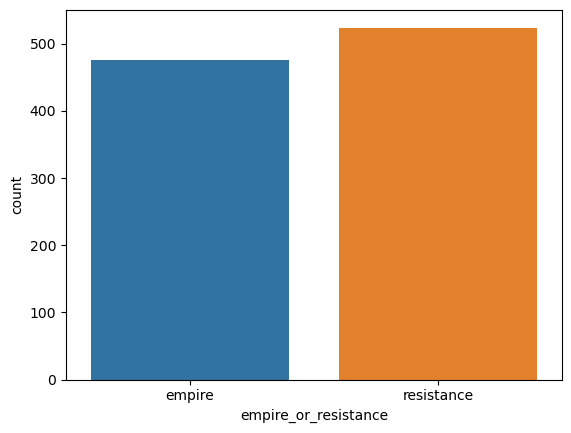

In [60]:
sns.barplot(count1_df, x='empire_or_resistance', y='count')

In [12]:
X = df[['homeworld', 'unit_type']]
y = df['is_resistance']

In [13]:
df_dummies = pd.get_dummies(df[['homeworld', 'unit_type']], dtype=float)
df_dummies.columns

Index(['homeworld_Alderaan', 'homeworld_Aleen Minor', 'homeworld_Bestine IV',
       'homeworld_Cerea', 'homeworld_Champala', 'homeworld_Chandrila',
       'homeworld_Concord Dawn', 'homeworld_Corellia', 'homeworld_Dagobah',
       'homeworld_Dathomir', 'homeworld_Dorin', 'homeworld_Eriadu',
       'homeworld_Glee Anselm', 'homeworld_Haruun Kal', 'homeworld_Iktotch',
       'homeworld_Iridonia', 'homeworld_Kalee', 'homeworld_Kashyyyk',
       'homeworld_Malastare', 'homeworld_Mirial', 'homeworld_Mon Cala',
       'homeworld_Muunilinst', 'homeworld_Naboo', 'homeworld_Ojom',
       'homeworld_Quermia', 'homeworld_Rodia', 'homeworld_Ryloth',
       'homeworld_Serenno', 'homeworld_Shili', 'homeworld_Skako',
       'homeworld_Socorro', 'homeworld_Stewjon', 'homeworld_Sullust',
       'homeworld_Tatooine', 'homeworld_Tholoth', 'homeworld_Toydaria',
       'homeworld_Trandosha', 'homeworld_Troiken', 'homeworld_Tund',
       'homeworld_Umbara', 'homeworld_Vulpter', 'homeworld_Zolan',
       'u

In [14]:
X = df_dummies
y = df['is_resistance']

In [15]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [20]:
# Get feature importances
importances = model.feature_importances_
# importances
# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

<Axes: xlabel='Feature', ylabel='Importance'>

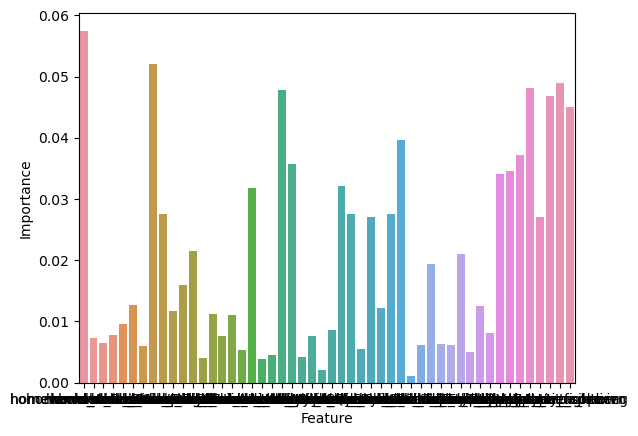

In [21]:
sns.barplot(feature_importances, x='Feature', y='Importance')

In [22]:
filename = "model.pkl"
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [23]:
df_real = pd.read_csv('troop_movements10m.csv')

In [24]:
df_real[df_real['unit_type'] == 'invalid_unit']

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
999,2023-06-13 17:16:43,1000,invalid_unit,1.0,6.0,1,0,Muunilinst
1999,2023-06-13 17:00:07,2000,invalid_unit,4.0,8.0,3,9,Troiken
2999,2023-06-13 16:43:31,3000,invalid_unit,6.0,3.0,4,9,Muunilinst
3999,2023-06-13 16:26:55,4000,invalid_unit,2.0,1.0,7,3,Dathomir
4999,2023-06-13 16:10:19,5000,invalid_unit,4.0,6.0,4,6,Naboo
...,...,...,...,...,...,...,...,...
9995999,2023-02-18 11:32:39,9996000,invalid_unit,1.0,4.0,8,0,Muunilinst
9996999,2023-02-18 11:16:04,9997000,invalid_unit,1.0,9.0,0,4,Trandosha
9997999,2023-02-18 10:59:28,9998000,invalid_unit,4.0,5.0,5,1,Trandosha
9998999,2023-02-18 10:42:52,9999000,invalid_unit,6.0,8.0,0,0,Chandrila


In [25]:
df_real2 = df_real.replace('invalid_unit', 'unknown')

In [26]:
df_real2

,timestamp,unit_id,unit_type,location_x,location_y,destination_x,destination_y,homeworld
0,2023-06-13 17:33:18,1,at-st,2.0,8.0,1,1,Glee Anselm
1,2023-06-13 17:33:17,2,tie_silencer,4.0,4.0,0,1,Trandosha
2,2023-06-13 17:33:16,3,at-at,0.0,3.0,6,1,Corellia
3,2023-06-13 17:33:15,4,tie_silencer,6.0,1.0,6,9,Shili
4,2023-06-13 17:33:14,5,tie_fighter,0.0,4.0,9,6,Muunilinst
...,...,...,...,...,...,...,...,...
9999995,2023-02-18 10:26:20,9999996,resistance_soldier,6.0,6.0,1,3,Troiken
9999996,2023-02-18 10:26:19,9999997,tie_silencer,8.0,6.0,2,0,Kashyyyk
9999997,2023-02-18 10:26:18,9999998,tie_fighter,7.0,7.0,6,4,Kashyyyk
9999998,2023-02-18 10:26:17,9999999,tie_fighter,6.0,6.0,8,8,Kalee


In [27]:
cols = ['location_x', 'location_y']
df_real2.loc[:,cols] = df_real2.loc[:,cols].ffill()

In [28]:
table = pa.Table.from_pandas(df_real2)
pq.write_table(table, 'troop_movements10m.parquet')